In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [45]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [46]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [47]:
indep=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dep=dataset['Purchased']

In [48]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)


In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.svm import SVC

In [51]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['linear','rbf','poly','sigmoid'],
             'gamma':['auto','scale'],
             'C':[10,100]} 



grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=3)

In [52]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)

# print classification report 
from sklearn.metrics import classification_report,accuracy_score,f1_score
clf_report = classification_report(y_test, grid_predictions)

In [53]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}: 0.9100355779243318


In [54]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[80  5]
 [ 7 42]]


In [55]:
print("The Classification report:\n",clf_report)
accuracy=accuracy_score(y_test,grid_predictions)
print("Accuracy score is        : ",accuracy)
f1=f1_score(y_test,grid_predictions)
print("f1 score is              : ",f1)

The Classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        85
           1       0.89      0.86      0.88        49

    accuracy                           0.91       134
   macro avg       0.91      0.90      0.90       134
weighted avg       0.91      0.91      0.91       134

Accuracy score is        :  0.9104477611940298
f1 score is              :  0.875


In [41]:
'''from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])'''

'from sklearn.metrics import roc_auc_score\n\nroc_auc_score(y_test,grid.predict_proba(X_test)[:,1])'

In [56]:
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004124,0.002787,0.007799,0.002957,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.776290,0.790949,0.698235,0.923510,0.901744,0.818146,0.083619,9
1,0.005007,0.002465,0.003325,0.002715,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.867478,0.886792,0.869709,0.944161,0.943041,0.902236,0.034431,3
2,0.006492,0.003714,0.005135,0.003675,10,auto,poly,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.799620,0.808392,0.787943,0.924528,0.901744,0.844445,0.056918,5
3,0.006174,0.002574,0.005563,0.001543,10,auto,sigmoid,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.762677,0.738916,0.655795,0.796284,0.766556,0.744045,0.047743,15
4,0.004084,0.001684,0.005323,0.002695,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.776290,0.790949,0.698235,0.923510,0.901744,0.818146,0.083619,9
5,0.004409,0.003604,0.008350,0.002511,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.867478,0.886792,0.869709,0.944161,0.943041,0.902236,0.034431,3
6,0.005030,0.001405,0.001787,0.001614,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.799620,0.808392,0.787943,0.924528,0.901744,0.844445,0.056918,5
7,0.005360,0.006633,0.006742,0.004594,10,scale,sigmoid,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.762677,0.738916,0.753180,0.778067,0.766556,0.759879,0.013172,13
8,0.019964,0.006957,0.004457,0.000504,100,auto,linear,"{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}",0.776290,0.790949,0.698235,0.923510,0.901744,0.818146,0.083619,9
9,0.006764,0.001472,0.005403,0.003388,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.867478,0.886792,0.870362,0.944161,0.943041,0.902367,0.034308,1


In [43]:
'''# Fit GridSearchCV to data
grid.fit(indep, dep)

# Get results of GridSearchCV
results = grid.cv_results_

# Plot the validation scores against different hyperparameters
plt.figure(figsize=(12, 6))
plt.plot(range(len(results['params'])), results['mean_test_score'], marker='o')
plt.xticks(range(len(results['params'])), [str(param) for param in results['params']], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Mean Test Score vs Hyperparameters')
plt.grid(True)
plt.show()'''

"# Fit GridSearchCV to data\ngrid.fit(indep, dep)\n\n# Get results of GridSearchCV\nresults = grid.cv_results_\n\n# Plot the validation scores against different hyperparameters\nplt.figure(figsize=(12, 6))\nplt.plot(range(len(results['params'])), results['mean_test_score'], marker='o')\nplt.xticks(range(len(results['params'])), [str(param) for param in results['params']], rotation=45)\nplt.xlabel('Hyperparameters')\nplt.ylabel('Mean Test Score (Accuracy)')\nplt.title('Mean Test Score vs Hyperparameters')\nplt.grid(True)\nplt.show()"

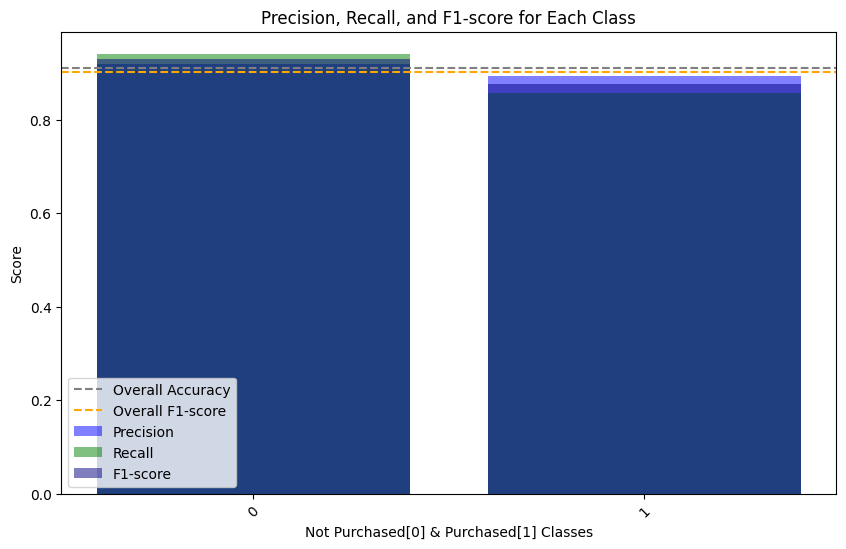

In [72]:
report = classification_report(y_test, grid_predictions, output_dict=True)

# Overall accuracy and F1-score
overall_accuracy = report['accuracy']
overall_f1_score = report['macro avg']['f1-score']

# Extract class-wise precision, recall, and F1-score
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
class_precision = [report[class_name]['precision'] for class_name in class_names]
class_recall = [report[class_name]['recall'] for class_name in class_names]
class_f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Plot graph for true class accuracy score and F1-score
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_precision, color='blue', alpha=0.5, label='Precision')
plt.bar(class_names, class_recall, color='green', alpha=0.5, label='Recall')
plt.bar(class_names, class_f1_score, color='#000080', alpha=0.5, label='F1-score')
plt.axhline(y=overall_accuracy, color='gray', linestyle='--', label='Overall Accuracy')
plt.axhline(y=overall_f1_score, color='orange', linestyle='--', label='Overall F1-score')
plt.xlabel('Not Purchased[0] & Purchased[1] Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(rotation=45)
plt.legend()
plt.show()